Имеются следующие данные:

- date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
- name – имя пользователя
- transaction – статус транзакции
- minute* – сколько минут прошло с начала дня
* Доступна в данных с 5 шага.

# 1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [2]:
import pandas as pd

In [6]:
transaction_data = pd.read_csv(r"E:\Downloads\transaction_data.csv", parse_dates=['date'])

In [7]:
transaction_data.shape

(5315, 3)

In [8]:
transaction_data.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [10]:
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [11]:
transaction_data.describe()

C:\Users\dimas\AppData\Local\Temp\ipykernel_10868\3961127521.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaction_data.describe()


date           name  transaction
count                  5315           5315         5315
unique                 3373             56            3
top     2020-03-02 00:33:10  Masha_Ozerova  successfull
freq                      6            112         3692
first   2020-03-02 00:00:00            NaN          NaN
last    2020-03-02 01:29:05            NaN          NaN

# 2. Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

In [14]:
transaction_data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [15]:
import seaborn as sns

C:\Users\dimas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transaction', ylabel='count'>

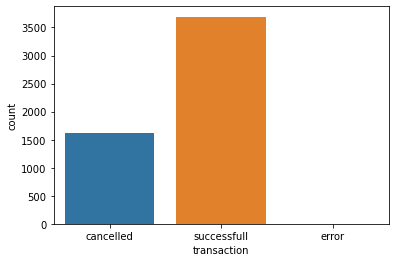

In [16]:
sns.countplot(transaction_data.transaction)

# 3. Сколько произошло ошибок?

In [20]:
transaction_data.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

# 4. Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

по оси x – число транзакций
по оси y – доля пользователей с таким числом транзакций

In [21]:
transaction_data.head(1)

date               name transaction
0 2020-03-02 00:37:20  Ekaterina_Petrova   cancelled

In [24]:
successfull_transaction_data = transaction_data.query('transaction == "successfull"') \
.groupby('name', as_index=False) \
.agg({'date': 'count'})

<AxesSubplot:xlabel='date', ylabel='Count'>

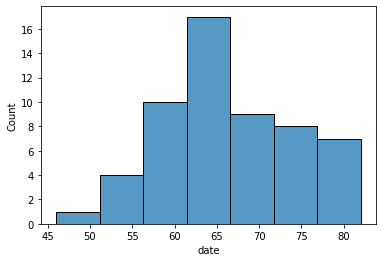

In [27]:
sns.histplot(successfull_transaction_data['date'])

In [28]:
successfull_transaction_data.date.describe()

count    56.000000
mean     65.928571
std       7.787769
min      46.000000
25%      61.000000
50%      64.000000
75%      72.000000
max      82.000000
Name: date, dtype: float64

# 5. К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

- столбцы – имена пользователей
- строки – минута времени осуществления операции (minute)
- значения – число совершённых операций
- Пропущенные значения заполните нулями.

In [68]:
transaction_data_updated = pd.read_csv(r"E:\Downloads\transaction_data_updated.csv", parse_dates=['date'])
transaction_data_updated.head(3)

date                name  transaction  minute
0 2020-03-02 00:37:20   Ekaterina_Petrova    cancelled      37
1 2020-03-02 00:59:09      Irina_Fedorova  successfull      59
2 2020-03-02 01:06:14  Ekaterina_Smirnova  successfull       6

In [66]:
pivot_table = transaction_data_updated.groupby(['name', 'minute'], as_index=False) \
.agg({'transaction': 'count'}) \
.pivot(index='minute', columns='name', values='transaction') \
.fillna(0).reset_index()
pivot_table.head(3)

name  minute  Ekaterina_Fedorova  Ekaterina_Ivanova  Ekaterina_Lesnova  \
0          0                 3.0                4.0                2.0   
1          1                 4.0                4.0                0.0   
2          2                 1.0                2.0                4.0   

name  Ekaterina_Ozerova  Ekaterina_Petrova  Ekaterina_Polyanova  \
0                   3.0                4.0                  4.0   
1                   4.0                2.0                  5.0   
2                   4.0                2.0                  1.0   

name  Ekaterina_Smirnova  Irina_Fedorova  Irina_Ivanova  ...  \
0                    2.0             1.0            2.0  ...   
1                    4.0             4.0            4.0  ...   
2                    3.0             2.0            3.0  ...   

name  Svetlana_Petrova  Svetlana_Polyanova  Svetlana_Smirnova  \
0                  0.0                 3.0                1.0   
1                  4.0                 5.0                3.0   
2                  4.0                 1.0                3.0   

name  Vasilisa_Fedorova  Vasilisa_Ivanova  Vasilisa_Lesnova  Vasilisa_Ozerova  \
0                   1.0               4.0               1.0               3.0   
1                   2.0               3.0               3.0               0.0   
2                   3.0               0.0               1.0               2.0   

name  Vasilisa_Petrova  Vasilisa_Polyanova  Vasilisa_Smirnova  
0                  0.0                 0.0                1.0  
1                  0.0                 3.0                2.0  
2                  1.0                 3.0                1.0  

[3 rows x 57 columns]

<AxesSubplot:xlabel='minute', ylabel='date'>

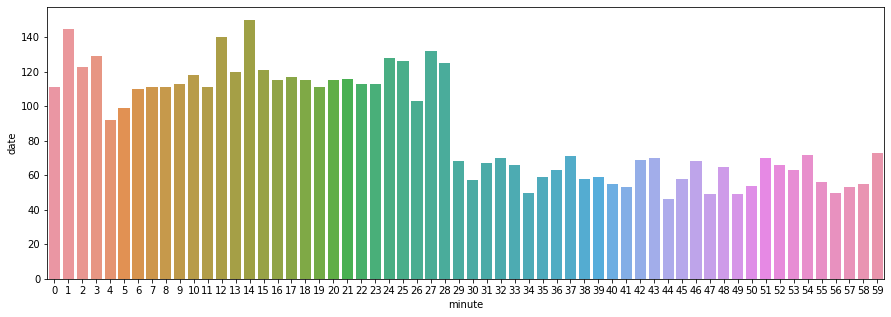

In [70]:
transaction_data_updated1 = transaction_data_updated.groupby('minute', as_index=False) \
.agg({'date': 'count'})
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
sns.barplot(x=transaction_data_updated1.minute, y=transaction_data_updated1.date)

# 6. Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).

In [72]:
transaction_data_updated['true_minute'] = transaction_data_updated.date.dt.minute + transaction_data_updated.date.dt.hour * 60

In [73]:
transaction_data_updated

date                name  transaction  minute  true_minute
0    2020-03-02 00:37:20   Ekaterina_Petrova    cancelled      37           37
1    2020-03-02 00:59:09      Irina_Fedorova  successfull      59           59
2    2020-03-02 01:06:14  Ekaterina_Smirnova  successfull       6           66
3    2020-03-02 00:02:58    Lolita_Polyanova    cancelled       2            2
4    2020-03-02 00:17:52      Julia_Smirnova    cancelled      17           17
...                  ...                 ...          ...     ...          ...
5310 2020-03-02 00:09:28   Vasilisa_Fedorova  successfull       9            9
5311 2020-03-02 00:46:31    Vasilisa_Ozerova  successfull      46           46
5312 2020-03-02 00:16:38      Olga_Polyanova  successfull      16           16
5313 2020-03-02 00:13:00  Ekaterina_Smirnova  successfull      13           13
5314 2020-03-02 01:15:45      Irina_Fedorova    cancelled      15           75

[5315 rows x 5 columns]

<AxesSubplot:xlabel='true_minute', ylabel='date'>

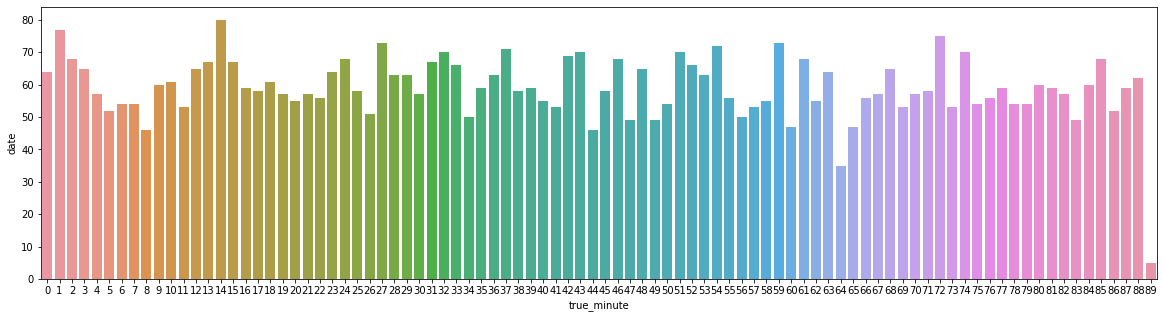

In [75]:
transaction_data_updated2 = transaction_data_updated.groupby('true_minute', as_index=False) \
.agg({'date': 'count'})
plt.figure(figsize=(20, 5))
sns.barplot(x=transaction_data_updated2.true_minute, y=transaction_data_updated2.date)